In [1]:
import pandas as pd

In [3]:
#data  = pd.read_excel('data_output.xlsx')
data  = pd.read_excel('white_paper8.xlsx')

In [5]:
data.columns.to_list()

['user_id',
 'full_name',
 'phone_number',
 'onboarding_date',
 'onboarding_time',
 'language',
 'gender',
 'date_of_birth',
 'age',
 'height',
 'weight',
 'bmi',
 'prakruti',
 'vikruti',
 'pulse_rate',
 'remark',
 'rhythm',
 'toxin_score',
 'immunity_score',
 'digestion_score',
 'hyperthinking_score',
 'stress_score',
 'hydration_score',
 'flexibility_score',
 'possibleHealthIssuesCurrent',
 'possibleHealthIssuesFuture',
 'strongOrgans',
 'weakOrgans',
 'bmi_category',
 'bmi_category_num',
 'current_issues_list',
 'future_issues_list',
 'strong_organs_list',
 'strong_brain',
 'strong_digestion',
 'strong_flexibility',
 'strong_gallbladder',
 'strong_heart',
 'strong_hydration',
 'strong_immunity',
 'strong_intestine',
 'strong_joints',
 'strong_kidney',
 'strong_liver',
 'strong_lungs',
 'strong_mind',
 'strong_muscles',
 'strong_nails',
 'strong_ojas',
 'strong_skin',
 'strong_stomach',
 'strong_urinary',
 'weak_organs_list',
 'weak_bones',
 'weak_brain',
 'weak_eyes',
 'weak_gallbla

In [7]:
data['created_at_datetime']

0                       NaN
1                       NaN
2                       NaN
3       2025-08-30 10:09:25
4       2025-08-30 10:09:25
               ...         
1176    2025-09-05 18:28:29
1177    2025-09-05 18:38:03
1178    2025-09-05 18:29:18
1179    2025-09-05 18:33:51
1180    2025-09-05 18:39:45
Name: created_at_datetime, Length: 1181, dtype: object

In [9]:
# Ensure datetime type
data["created_at_datetime"] = pd.to_datetime(data["created_at_datetime"], errors="coerce")

# Extract date and hour
data["created_at_date"] = data["created_at_datetime"].dt.date
data["created_at_hour"] = data["created_at_datetime"].dt.hour

In [15]:
data['created_at_hour'].unique()

array([nan, 10., 11., 12., 13., 14., 15., 17., 16., 19., 18., 20., 21.,
       22., 23.,  0.])

In [47]:
def categorize_prahar(hour):
    if pd.isna(hour):
        return "other"
    
    if 6 <= hour < 10:
        return "prahar_1"
    elif 10 <= hour < 14:
        return "prahar_2"
    elif 14 <= hour < 18:
        return "prahar_3"
    elif 18 <= hour < 22:
        return "prahar_4"
    elif 22<= hour <=23 or 0<= hour <2:
        return "prahar_5"
    else:
        return "prahar_6"

data["created_time_category"] = data["created_at_hour"].apply(categorize_prahar)

In [25]:
data["created_time_category"].unique()

array(['other', 'prahar_1', 'prahar_2', 'prahar_3', 'prahar_4'],
      dtype=object)

In [27]:
import pandas as pd

# --- 1. Age categorization ---
def categorize_age(age):
    if age <= 25:
        return "young_adult"
    elif 26 <= age <= 50:
        return "adult"
    elif 51 <= age <= 70:
        return "older_adult"
    else:
        return "elderly"

data["age_category"] = data["age"].apply(categorize_age)

# --- 2. Score categorization ---
score_columns = [
    "toxin_score", "immunity_score", "digestion_score",
    "hyperthinking_score", "stress_score", "hydration_score",
    "flexibility_score"
]

def categorize_score(val):
    if val <= 30:
        return "low"
    elif 31 <= val <= 70:
        return "medium"
    else:
        return "high"

for col in score_columns:
    cat_col = col.replace("_score", "_category")
    data[cat_col] = data[col].apply(categorize_score)


In [29]:
# --- 3. Pulse rate categorization ---
def categorize_pulse(val):
    if val <= 59:
        return "low"
    elif 60 <= val <= 100:
        return "normal"
    else:
        return "high"

data["pulse_rate_category"] = data["pulse_rate"].apply(categorize_pulse)

In [37]:
data['age_category'].unique()

array(['adult', 'young_adult', 'older_adult', 'elderly'], dtype=object)

In [39]:
import pandas as pd

# Save dataframe to Excel
output_file = "white_paper_final.xlsx"
data.to_excel(output_file, index=False)

print(f"Dataframe saved as {output_file}")

Dataframe saved as white_paper_final.xlsx


In [41]:
#VIKRUTI BY AGE

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="age_category",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
age_order = ["young_adult", "adult", "older_adult", "elderly"]
pivot_counts = pivot_counts.reindex(age_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
age_category,,,,,,,,
young_adult,0.0,8.0,10.0,10.0,56.0,6.0,10.0,50
adult,0.2,8.2,8.6,11.2,59.9,4.1,7.9,466
older_adult,0.0,8.8,6.1,13.5,60.8,6.1,4.7,148
elderly,0.0,0.0,13.3,13.3,53.3,6.7,13.3,15
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [43]:
#VIKRUTI BY GENDER

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="gender",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#age_order = ["young_adult", "adult", "older_adult", "elderly"]
#pivot_counts = pivot_counts.reindex(age_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
gender,,,,,,,,
F,0.4,10.3,9.2,12.5,55.9,4.8,7.0,272
M,0.0,6.7,7.6,11.1,62.1,4.7,7.9,406
P,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [65]:
#VIKRUTI BY BMI CATEGORY

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="bmi_category",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
bmi_order = ["underweight", "normal", "overweight", "obese"]
pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
bmi_category,,,,,,,,
underweight,0.0,0.0,15.6,9.4,59.4,6.2,9.4,32
normal,0.3,10.8,9.1,10.8,59.2,4.2,5.6,287
overweight,0.0,7.7,5.9,11.7,61.5,4.8,8.4,273
obese,0.0,3.4,10.3,14.9,55.2,5.7,10.3,87
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [69]:
#PRAKRUTI VS AGE

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="age_category",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
age_order = ["young_adult", "adult", "older_adult", "elderly"]
pivot_counts = pivot_counts.reindex(age_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
age_category,,,,,,,
young_adult,6.0,2.0,18.0,42.0,4.0,28.0,50
adult,7.7,3.2,19.3,35.8,4.9,29.0,466
older_adult,8.1,5.4,21.6,25.0,8.1,31.8,148
elderly,0.0,0.0,20.0,33.3,13.3,33.3,15
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [71]:
#PRAKRUTI VS GENDER

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="gender",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#bmi_order = ["underweight", "normal", "overweight", "elderly"]
#pivot_counts = pivot_counts.reindex(age_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
gender,,,,,,,
F,7.4,3.3,18.8,34.2,6.6,29.8,272
M,7.6,3.7,20.2,33.7,5.2,29.6,406
P,0.0,0.0,100.0,0.0,0.0,0.0,1
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [73]:
#BMI VS PRAKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="bmi_category",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
bmi_order = ["underweight", "normal", "overweight","obese"]
pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
bmi_category,,,,,,,
underweight,12.5,0.0,25.0,28.1,6.2,28.1,32
normal,8.4,4.5,23.3,32.1,5.9,25.8,287
overweight,5.9,2.6,17.2,35.9,5.1,33.3,273
obese,8.0,4.6,13.8,35.6,6.9,31.0,87
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [79]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="prakruti",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#bmi_order = ["underweight", "normal", "overweight","obese"]
#pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
prakruti,,,,,,,,
Kapha Pitta,0.0,9.8,15.7,7.8,60.8,0.0,5.9,51
Kapha Vata,0.0,4.2,16.7,4.2,62.5,0.0,12.5,24
Pitta Kapha,0.0,7.5,9.0,14.2,58.2,4.5,6.7,134
Pitta Vata,0.4,8.3,7.4,12.2,59.6,6.5,5.7,230
Vata Kapha,0.0,12.8,7.7,7.7,53.8,0.0,17.9,39
Vata Pitta,0.0,7.5,6.0,11.9,61.2,5.5,8.0,201
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [81]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="remark",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#bmi_order = ["underweight", "normal", "overweight","obese"]
#pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
remark,,,,,,,,
Bad,0.0,10.4,14.6,10.8,50.5,1.9,11.8,212
Good,0.2,7.1,5.4,12.0,63.8,6.0,5.6,467
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [83]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="rhythm",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#bmi_order = ["underweight", "normal", "overweight","obese"]
#pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
rhythm,,,,,,,,
Irregular,0.0,11.5,15.8,9.7,47.9,4.8,10.3,165
Regular,0.2,7.0,5.8,12.3,63.4,4.7,6.6,514
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [85]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="remark",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#bmi_order = ["underweight", "normal", "overweight","obese"]
#pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent


prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
remark,,,,,,,
Bad,8.0,2.8,24.1,33.5,4.2,27.4,212
Good,7.3,3.9,17.8,34.0,6.4,30.6,467
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [87]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="rhythm",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
#bmi_order = ["underweight", "normal", "overweight","obese"]
#pivot_counts = pivot_counts.reindex(bmi_order)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
rhythm,,,,,,,
Irregular,5.5,3.0,20.6,35.8,6.1,29.1,165
Regular,8.2,3.7,19.5,33.3,5.6,29.8,514
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [91]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="toxin_category",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
category = ["high", "medium", "low"]
pivot_counts = pivot_counts.reindex(category)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
toxin_category,,,,,,,
high,5.9,0.0,29.4,23.5,5.9,35.3,17
medium,9.2,3.9,17.5,39.3,5.2,24.9,229
low,6.7,3.5,20.6,31.4,6.0,31.9,433
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [93]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="toxin_category",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
category = ["high", "medium", "low"]
pivot_counts = pivot_counts.reindex(category)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
toxin_category,,,,,,,,
high,0.0,17.6,29.4,5.9,23.5,0.0,23.5,17
medium,0.0,7.9,9.2,12.7,56.8,3.9,9.6,229
low,0.2,7.9,6.9,11.3,62.6,5.3,5.8,433
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [97]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="immunity_category",
    columns="prakruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
category = ["high", "medium", "low"]
pivot_counts = pivot_counts.reindex(category)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

prakruti,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata Kapha,Vata Pitta,Total
immunity_category,,,,,,,
high,8.1,3.5,19.1,32.9,3.5,32.9,173
medium,7.4,4.1,20.4,32.2,7.4,28.4,363
low,7.0,2.1,18.9,39.2,4.2,28.7,143
Total,51.0,24.0,134.0,230.0,39.0,201.0,679


In [99]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="immunity_category",
    columns="vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
category = ["high", "medium", "low"]
pivot_counts = pivot_counts.reindex(category)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

vikruti,Kapha,Kapha Pitta,Kapha Vata,Pitta Kapha,Pitta Vata,Vata,Vata Kapha,Total
immunity_category,,,,,,,,
high,0.0,9.2,2.3,9.8,73.4,1.7,3.5,173
medium,0.3,9.4,9.1,11.6,57.9,3.3,8.5,363
low,0.0,3.5,13.3,14.0,47.6,11.9,9.8,143
Total,1.0,55.0,56.0,79.0,405.0,32.0,51.0,679


In [153]:
#PRAKRUTI vs VIKRUTI

# Ensure onboarding_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: counts of rows by age_category and vikruti
pivot_counts = pd.pivot_table(
    filtered,
    index="digestion_category",
    columns="toxin_category",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Define desired row order
category = ['high', "medium", "low"]
pivot_counts = pivot_counts.reindex(category)

# Convert counts → percentages (row-wise)
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Add raw total column (per row)
pivot_percent["Total"] = pivot_counts.sum(axis=1)

# Round percentages
pivot_percent = pivot_percent.round(1)

# Add column totals row (raw counts only)
totals_row = pivot_counts.sum(axis=0)
totals_row["Total"] = pivot_counts.values.sum()

# Append totals row at bottom
pivot_percent.loc["Total"] = totals_row

pivot_percent

toxin_category,high,low,medium,Total
digestion_category,,,,
high,0.8,67.7,31.6,266
medium,4.0,61.0,35.0,374
low,0.0,64.1,35.9,39
Total,17.0,433.0,229.0,679


In [143]:
data.loc[data['flexibility_category']=='high', 'vikruti']

0       NaN
1       NaN
2       NaN
21      NaN
36      NaN
       ... 
1117    NaN
1130    NaN
1140    NaN
1141    NaN
1165    NaN
Name: vikruti, Length: 166, dtype: object

In [223]:
# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Pivot: raw counts
pivot_counts = pd.pivot_table(
    filtered,
    index="pulse_rate_category",
    columns="dominant_vikruti",
    values="user_id",
    aggfunc="count",
    fill_value=0
)

# Desired order
category_order = ["low", "normal", "high"]


# Reorder rows and columns
pivot_counts = pivot_counts.reindex(index=category_order)#, columns=category_order)

# --- Row percentages ---
pivot_percent = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100
pivot_percent = pivot_percent.round(1)

# --- Add raw row totals ---
pivot_percent["Row_Total"] = pivot_counts.sum(axis=1)

# --- Overall percentages (by column) ---
col_totals = pivot_counts.sum(axis=0)          # raw counts per column
grand_total = col_totals.sum()                 # raw grand total
overall_percent = (col_totals / grand_total) * 100
overall_percent = overall_percent.round(1)

# Overall_Percent row
overall_row = overall_percent.to_dict()
overall_row["Row_Total"] = grand_total

# Column_Total row (raw counts)
col_totals_row = col_totals.to_dict()
col_totals_row["Row_Total"] = grand_total

# Combine into final table
final_table = pivot_percent.copy()
final_table.loc["Overall_Percent"] = overall_row
final_table.loc["Column_Total"] = col_totals_row

final_table

dominant_vikruti,Kapha,Pitta,Vata,Row_Total
pulse_rate_category,,,,
low,0.0,100.0,0.0,3
normal,16.5,72.7,10.8,611
high,16.9,56.9,26.2,65
Overall_Percent,16.5,71.3,12.2,679
Column_Total,112.0,484.0,83.0,679


In [28]:
import pandas as pd

# Save dataframe to Excel
output_file = "white_paper8.xlsx"
data.to_excel(output_file, index=False)

print(f"Dataframe saved as {output_file}")

Dataframe saved as white_paper8.xlsx


In [195]:
# Create dominant_prakruti column by taking the first word
data["dominant_prakruti"] = data["prakruti"].str.split().str[0]

In [197]:
# Create dominant_prakruti column by taking the first word
data["dominant_vikruti"] = data["vikruti"].str.split().str[0]

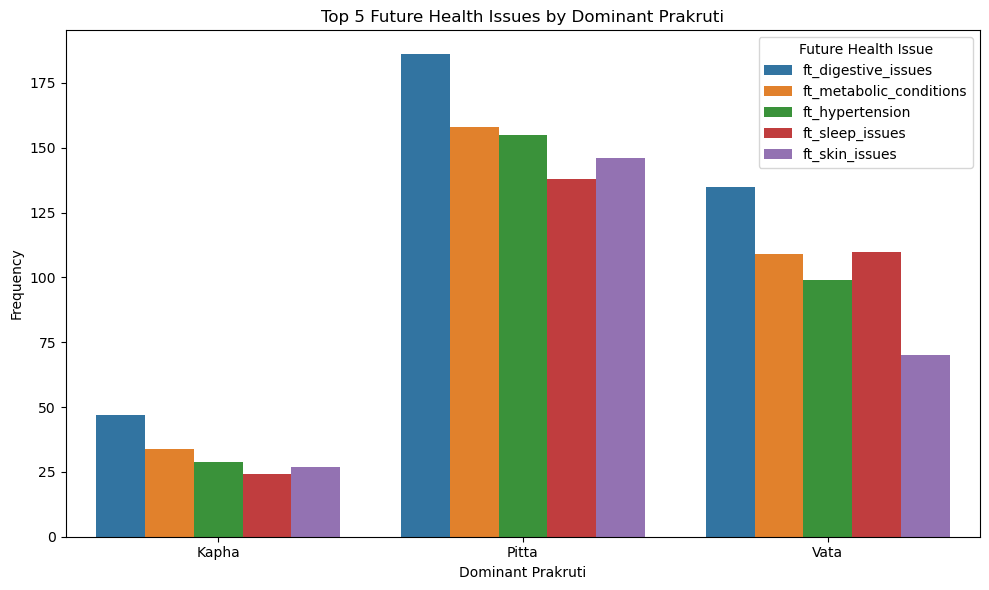

In [33]:
#PRAKRUTI VS CURRENT HEALTH ISSUES

# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of health issue columns (OHE 1/0)
ft_health_issues = [
    "ft_acid_reflux", "ft_anxiety", "ft_appetite_issues", "ft_cardiac_disease",
    "ft_cardiac_irregularity", "ft_digestive_issues", "ft_dosha_imbalance",
    "ft_fatigue_low_energy", "ft_fatty_liver", "ft_hypertension",
    "ft_immunity_issues", "ft_inflammation", "ft_irritability",
    "ft_joint_issues", "ft_mental_clarity", "ft_mental_health",
    "ft_metabolic_conditions", "ft_migraine", "ft_neurological",
    "ft_obesity_weight", "ft_pcod_pcos", "ft_respiratory_issues",
    "ft_skin_issues", "ft_sleep_issues", "ft_stress", "ft_thyroid_issues",
    "ft_type_2_diabetes", "ft_weight_loss"
]


# Step 1: Get top 5 issues overall
issue_totals = filtered[ft_health_issues].sum().sort_values(ascending=False)
top5_issues = issue_totals.head(5).index.tolist()

# Step 2: Group by dominant_prakruti and sum only top5 issues
grouped = filtered.groupby("dominant_prakruti")[top5_issues].sum()

# Step 3: Melt for seaborn
plot_df = grouped.reset_index().melt(id_vars="dominant_prakruti", 
                                     value_vars=top5_issues, 
                                     var_name="Future_Health_Issue", 
                                     value_name="Count")

# Step 4: Plot clustered bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x="dominant_prakruti", y="Count", hue="Future_Health_Issue")
plt.title("Top 5 Future Health Issues by Dominant Prakruti")
plt.ylabel("Frequency")
plt.xlabel("Dominant Prakruti")
plt.legend(title="Future Health Issue")
plt.tight_layout()
plt.savefig("dominant_prakruti_future_health_issues.png", dpi=300, bbox_inches="tight")
plt.show()


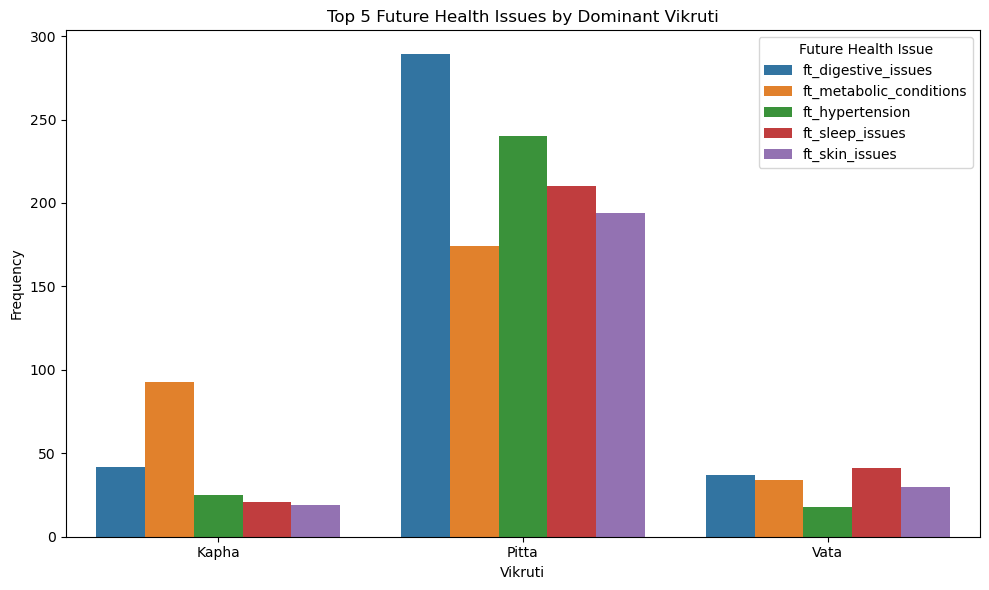

In [35]:
# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of health issue columns (OHE 1/0)
ft_health_issues = [
    "ft_acid_reflux", "ft_anxiety", "ft_appetite_issues", "ft_cardiac_disease",
    "ft_cardiac_irregularity", "ft_digestive_issues", "ft_dosha_imbalance",
    "ft_fatigue_low_energy", "ft_fatty_liver", "ft_hypertension",
    "ft_immunity_issues", "ft_inflammation", "ft_irritability",
    "ft_joint_issues", "ft_mental_clarity", "ft_mental_health",
    "ft_metabolic_conditions", "ft_migraine", "ft_neurological",
    "ft_obesity_weight", "ft_pcod_pcos", "ft_respiratory_issues",
    "ft_skin_issues", "ft_sleep_issues", "ft_stress", "ft_thyroid_issues",
    "ft_type_2_diabetes", "ft_weight_loss"
]

# Step 1: Get top 5 issues overall
issue_totals = filtered[ft_health_issues].sum().sort_values(ascending=False)
top5_issues = issue_totals.head(5).index.tolist()

# Step 2: Group by dominant_prakruti and sum only top5 issues
grouped = filtered.groupby("dominant_vikruti")[top5_issues].sum()

# Step 3: Melt for seaborn
plot_df = grouped.reset_index().melt(id_vars="dominant_vikruti", 
                                     value_vars=top5_issues, 
                                     var_name="Future_Health_Issue", 
                                     value_name="Count")

# Step 4: Plot clustered bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x="dominant_vikruti", y="Count", hue="Future_Health_Issue")
plt.title("Top 5 Future Health Issues by Dominant Vikruti")
plt.ylabel("Frequency")
plt.xlabel("Vikruti")
plt.legend(title="Future Health Issue")
plt.tight_layout()
plt.savefig("dominant_vikruti_future_health_issues.png", dpi=300, bbox_inches="tight")
plt.show()


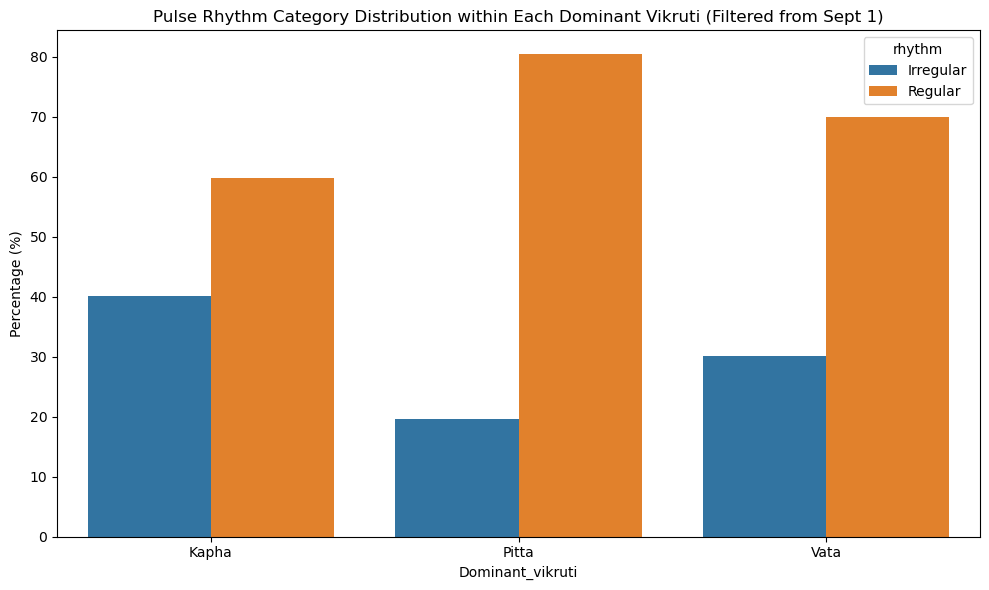

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Step 1: Count vikruti occurrences per age_category
counts = filtered.groupby(["dominant_vikruti", "rhythm"]).size().reset_index(name="Count")

# Step 2: Convert to percentages within each age_category
counts["Percentage"] = counts.groupby("dominant_vikruti")["Count"].transform(lambda x: 100 * x / x.sum())

# Step 3: Plot clustered bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=counts, x="dominant_vikruti", y="Percentage", hue="rhythm")

plt.title("Pulse Rhythm Category Distribution within Each Dominant Vikruti (Filtered from Sept 1)")
plt.ylabel("Percentage (%)")
plt.xlabel("Dominant_vikruti")
plt.legend(title="rhythm")
plt.tight_layout()
plt.savefig("vikruti_vs_pulse_rhythm_percentage.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_54032\4226138636.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["stress_category"] = pd.Categorical(filtered["stress_category"], categories=order, ordered=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54032\4226138636.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["digestion_category"] = pd.Categorical(filtered["digestion_category"], categories=order, ordered=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54032\4226138636.py:20

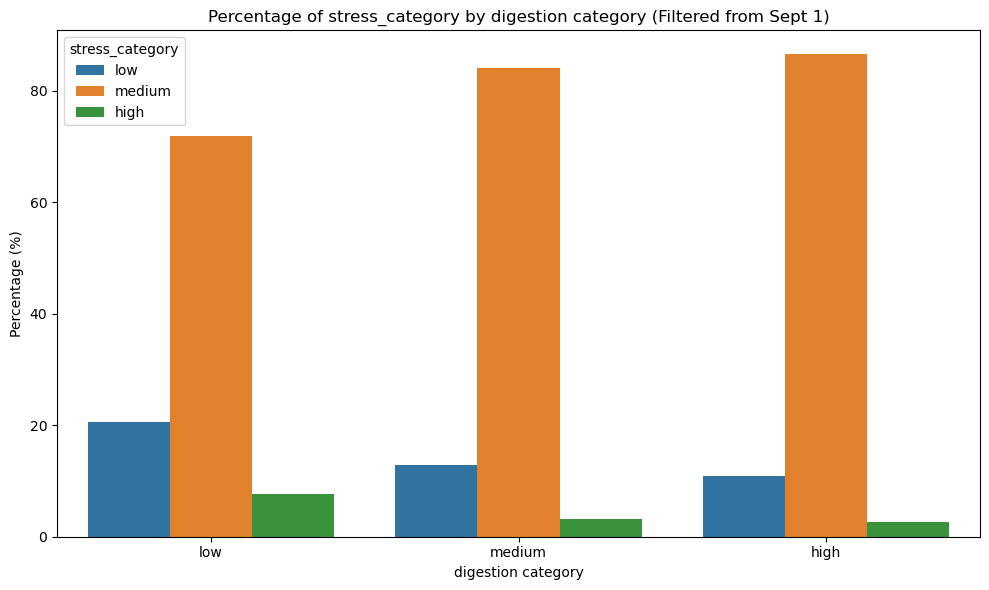

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Define age category order
order = ["low", "medium", "high"]
filtered["stress_category"] = pd.Categorical(filtered["stress_category"], categories=order, ordered=True)
filtered["digestion_category"] = pd.Categorical(filtered["digestion_category"], categories=order, ordered=True)

# Step 1: Count vikruti occurrences per age_category
counts = filtered.groupby(["digestion_category", "stress_category"]).size().reset_index(name="Count")

# Step 2: Convert to percentages within each age_category
counts["Percentage"] = counts.groupby("digestion_category")["Count"].transform(lambda x: 100 * x / x.sum())

# Step 3: Plot clustered bar chart with custom order
plt.figure(figsize=(10,6))
sns.barplot(data=counts, x="digestion_category", y="Percentage", hue="stress_category", order=order)

plt.title("Percentage of stress_category by digestion category (Filtered from Sept 1)")
plt.ylabel("Percentage (%)")
plt.xlabel("digestion category")
plt.legend(title="stress_category")
plt.tight_layout()
plt.savefig("digestion_category_vs_stress_cat_percentage.png", dpi=300, bbox_inches="tight")
plt.show()

In [59]:
data['created_time_category'].unique()

array(['other', 'prahar_2', 'prahar_3', 'prahar_4', 'prahar_5'],
      dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_54032\3651805151.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["bmi_category"] = pd.Categorical(filtered["bmi_category"], categories=order, ordered=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54032\3651805151.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = filtered.groupby(["dominant_prakruti", "bmi_category"]).size().reset_index(name="Count")


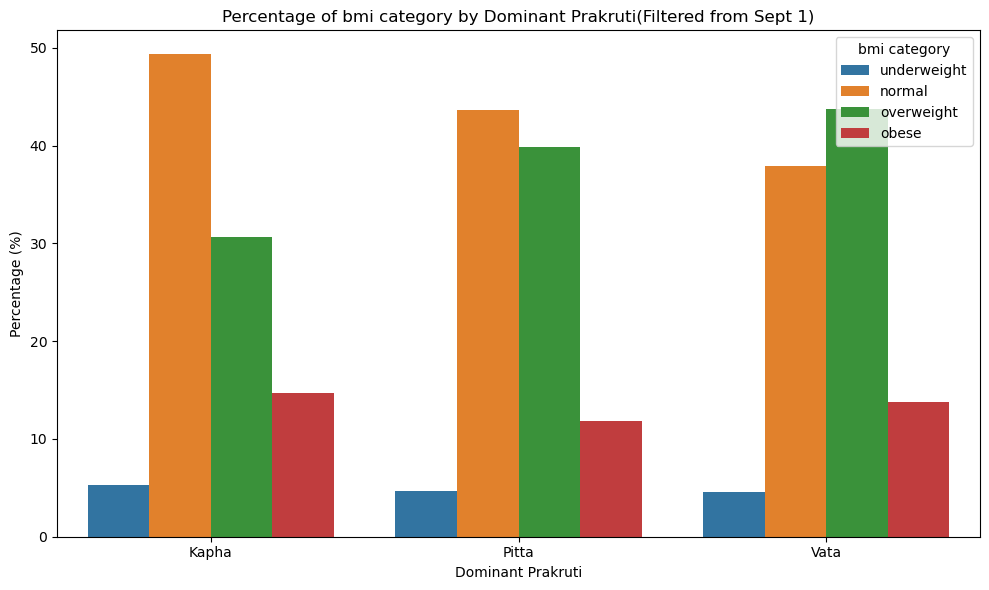

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Apply filters
filtered = data[
    (data["created_at_date"] >= "2025-09-01") &
    (data["prakruti"].notna())
]

# Define age category order
order = ["underweight", "normal", "overweight", "obese"]
filtered["bmi_category"] = pd.Categorical(filtered["bmi_category"], categories=order, ordered=True)

# Step 1: Count vikruti occurrences per age_category
counts = filtered.groupby(["dominant_prakruti", "bmi_category"]).size().reset_index(name="Count")

# Step 2: Convert to percentages within each age_category
counts["Percentage"] = counts.groupby("dominant_prakruti")["Count"].transform(lambda x: 100 * x / x.sum())

# Step 3: Plot clustered bar chart with custom order
plt.figure(figsize=(10,6))
sns.barplot(data=counts, x="dominant_prakruti", y="Percentage", hue="bmi_category")

plt.title("Percentage of bmi category by Dominant Prakruti(Filtered from Sept 1)")
plt.ylabel("Percentage (%)")
plt.xlabel("Dominant Prakruti")
plt.legend(title="bmi category")
plt.tight_layout()
plt.savefig("dom_prakruti_percentage_vs_bmi_category.png", dpi=300, bbox_inches="tight")
plt.show()

In [5]:
data.columns.to_list()

['user_id',
 'full_name',
 'phone_number',
 'onboarding_date',
 'onboarding_time',
 'language',
 'gender',
 'date_of_birth',
 'age',
 'height',
 'weight',
 'bmi',
 'prakruti',
 'vikruti',
 'pulse_rate',
 'remark',
 'rhythm',
 'toxin_score',
 'immunity_score',
 'digestion_score',
 'hyperthinking_score',
 'stress_score',
 'hydration_score',
 'flexibility_score',
 'possibleHealthIssuesCurrent',
 'possibleHealthIssuesFuture',
 'strongOrgans',
 'weakOrgans',
 'bmi_category',
 'bmi_category_num',
 'current_issues_list',
 'acid_reflux',
 'anxiety',
 'appetite_issues',
 'cardiac_irregularity',
 'digestive_issues',
 'dosha_imbalance',
 'elevated_pulse',
 'fatigue_low_energy',
 'hydration_issues',
 'hypertension',
 'immunity_issues',
 'inflammation',
 'irritability',
 'joint_issues',
 'metabolic_conditions',
 'obesity_weight',
 'respiratory_issues',
 'skin_issues',
 'sleep_issues',
 'stress',
 'thyroid_issues',
 'toxin_accumulation',
 'future_issues_list',
 'ft_acid_reflux',
 'ft_anxiety',
 'ft_

In [15]:
import ast

# Convert stringified lists to actual lists
data["current_issues_list"] = data["current_issues_list"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
data["future_issues_list"] = data["future_issues_list"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now merge them row-wise
data["health_issues"] = data.apply(
    lambda row: row["current_issues_list"] + row["future_issues_list"], axis=1
)

In [10]:
import re

# Step 1: Extract only the issues (before the first comma in each segment)
def extract_issues(cell):
    if pd.isna(cell):
        return []
    parts = [seg.split(",")[0].strip() for seg in cell.split(";")]
    return parts

data["current_issues_list"] = data["possibleHealthIssuesCurrent"].apply(extract_issues)

# Step 2: Clean issue names for column use
def clean_name(name):
    name = name.lower().strip()
    name = re.sub(r"[^0-9a-zA-Z]+", "_", name)   # replace non-alphanumeric with underscore
    name = re.sub(r"_+", "_", name).strip("_")   # collapse multiple underscores
    return name

# Step 3: Get all unique cleaned issues
all_issues = sorted({clean_name(issue) for issues in data["current_issues_list"] for issue in issues})

# Step 4: Create 1/0 columns for each issue with "cr_" prefix
for issue in all_issues:
    col_name = f"cr_{issue}"
    data[col_name] = data["current_issues_list"].apply(lambda x: 1 if issue in [clean_name(i) for i in x] else 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\1469890203.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name] = data["current_issues_list"].apply(lambda x: 1 if issue in [clean_name(i) for i in x] else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\1469890203.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name] = data["current_issues_list"].apply(lambda x: 1 if issue in [clean_name(i) for i in x] else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\1469890203.py:25: PerformanceWarning

In [12]:
data.columns.to_list()

['user_id',
 'full_name',
 'phone_number',
 'onboarding_date',
 'onboarding_time',
 'language',
 'gender',
 'date_of_birth',
 'age',
 'height',
 'weight',
 'bmi',
 'prakruti',
 'vikruti',
 'pulse_rate',
 'remark',
 'rhythm',
 'toxin_score',
 'immunity_score',
 'digestion_score',
 'hyperthinking_score',
 'stress_score',
 'hydration_score',
 'flexibility_score',
 'possibleHealthIssuesCurrent',
 'possibleHealthIssuesFuture',
 'strongOrgans',
 'weakOrgans',
 'bmi_category',
 'bmi_category_num',
 'current_issues_list',
 'future_issues_list',
 'strong_organs_list',
 'strong_brain',
 'strong_digestion',
 'strong_flexibility',
 'strong_gallbladder',
 'strong_heart',
 'strong_hydration',
 'strong_immunity',
 'strong_intestine',
 'strong_joints',
 'strong_kidney',
 'strong_liver',
 'strong_lungs',
 'strong_mind',
 'strong_muscles',
 'strong_nails',
 'strong_ojas',
 'strong_skin',
 'strong_stomach',
 'strong_urinary',
 'weak_organs_list',
 'weak_bones',
 'weak_brain',
 'weak_eyes',
 'weak_gallbla

In [14]:
# # mapping: original column name -> list of canonical group(s)
# orig_to_canonical = {
#  'acid_reflux': ['acid_reflux'],
#  'acidity': ['acid_reflux'],
#  'acidity_heartburn': ['acid_reflux'],
#  'anxiety': ['anxiety'],
#  'anxiety_and_hyperthinking': ['anxiety'],
#  'anxiety_and_restlessness': ['anxiety'],
#  'anxiety_and_restlessness_due_to_vata_aggravation': ['anxiety','dosha_imbalance'],
#  'anxiety_and_sleep_disturbances_stress_and_hyperthinking': ['anxiety','sleep_issues','stress'],
#  'anxiety_overthinking': ['anxiety'],
#  'bloating': ['digestive_issues'],
#  'bloating_and_gas': ['digestive_issues'],
#  'bloating_and_heaviness': ['digestive_issues','fatigue_low_energy'],
#  'constipation': ['digestive_issues'],
#  'digestive_acidity': ['digestive_issues', 'acid_reflux'],
#  'digestive_discomfort': ['digestive_issues'],
#  'digestive_irregularities': ['digestive_issues'],
#  'digestive_irregularities_like_bloating_and_constipation': ['digestive_issues'],
#  'digestive_irregularities_like_bloating_and_gas': ['digestive_issues'],
#  'digestive_irregularities_like_bloating_and_irregular_bowel_movements': ['digestive_issues'],
#  'digestive_irregularities_like_bloating_or_constipation': ['digestive_issues'],
#  'digestive_irregularities_like_gas_and_bloating': ['digestive_issues'],
#  'digestive_irregularities_such_as_bloating_and_irregular_bowel_movements': ['digestive_issues'],
#  'digestive_irregularity': ['digestive_issues'],
#  'digestive_issues_like_bloating': ['digestive_issues'],
#  'digestive_issues_like_bloating_and_irregular_bowel_movements': ['digestive_issues'],
#  'digestive_sluggishness_and_bloating': ['digestive_issues'],
#  'digestive_variability': ['digestive_issues'],
#  'dry_skin': ['skin_issues'],
#  'elevated_heart_rate': ['elevated_pulse'],
#  'elevated_pulse_rate': ['elevated_pulse'],
#  'fatigue': ['fatigue_low_energy'],
#  'fatigue_and_erratic_energy_levels': ['fatigue_low_energy'],
#  'fatigue_and_fluctuating_energy': ['fatigue_low_energy'],
#  'fatigue_due_to_fluctuating_energy_levels': ['fatigue_low_energy'],
#  'fatigue_or_energy_fluctuations_pitta_vata_vikruti': ['fatigue_low_energy','dosha_imbalance'],
#  'fatty_liver': ['metabolic_conditions'],
#  'feeling_heavy': ['fatigue_low_energy'],
#  'feeling_of_heaviness_after_meals_kapha_imbalance': ['digestive_issues','dosha_imbalance'],
#  'feeling_of_heaviness_or_sluggishness': ['fatigue_low_energy'],
#  'fluctuating_energy': ['fatigue_low_energy'],
#  'fluctuating_energy_levels': ['fatigue_low_energy'],
#  'frequent_colds': ['immunity_issues'],
#  'heartburn': ['acid_reflux'],
#  'high_cholesterol': ['metabolic_conditions'],
#  'high_pulse_rate': ['elevated_pulse'],
#  'high_stress': ['stress'],
#  'hormonal_imbalance': ['metabolic_conditions'],
#  'hyperacidity': ['acid_reflux'],
#  'hypertension': ['hypertension'],
#  'hypertension_elevated_pulse_rate_and_potential_kapha_influence_on_circulation': ['hypertension','elevated_pulse','dosha_imbalance'],
#  'hyperthinking': ['anxiety'],
#  'hyperthyroidism': ['thyroid_issues'],
#  'hypothyroidism': ['thyroid_issues'],
#  'increased_mucus_production': ['respiratory_issues'],
#  'increased_pulse_rate': ['elevated_pulse'],
#  'indigestion': ['digestive_issues'],
#  'indigestion_and_bloating': ['digestive_issues'],
#  'inflammation': ['inflammation'],
#  'irregular_appetite': ['appetite_issues'],
#  'irregular_bowel_movements': ['digestive_issues'],
#  'irregular_digestion': ['digestive_issues'],
#  'irregular_digestion_and_bloating': ['digestive_issues'],
#  'irregular_energy_levels': ['fatigue_low_energy'],
#  'irregular_heart_rhythm': ['cardiac_irregularity'],
#  'irregular_heartbeat': ['cardiac_irregularity'],
#  'irregular_pulse': ['cardiac_irregularity'],
#  'irregular_pulse_and_potential_fatigue': ['cardiac_irregularity','fatigue_low_energy'],
#  'irregular_pulse_rhythm': ['cardiac_irregularity'],
#  'irritability': ['irritability'],
#  'joint_discomfort': ['joint_issues'],
#  'joint_pain': ['joint_issues'],
#  'joint_pain_and_stiffness': ['joint_issues'],
#  'joint_stiffness': ['joint_issues'],
#  'joint_stiffness_and_cracking': ['joint_issues'],
#  'joint_stiffness_and_dryness': ['joint_issues','skin_issues'],
#  'joint_stiffness_and_occasional_pain': ['joint_issues'],
#  'joint_stiffness_and_pain_low_flexibility_and_vata_aggravation': ['joint_issues','dosha_imbalance'],
#  'joint_stiffness_or_cracking': ['joint_issues'],
#  'joint_stiffness_or_discomfort': ['joint_issues'],
#  'kapha_pitta_imbalance': ['dosha_imbalance'],
#  'lethargy': ['fatigue_low_energy'],
#  'low_digestion': ['digestive_issues'],
#  'low_energy': ['fatigue_low_energy'],
#  'low_flexibility': ['joint_issues'],
#  'low_hydration': ['hydration_issues'],
#  'low_hydration_levels': ['hydration_issues'],
#  'low_immunity': ['immunity_issues'],
#  'medium_digestion': ['digestive_issues'],
#  'medium_hydration': ['hydration_issues'],
#  'medium_hyperthinking': ['anxiety'],
#  'medium_stress': ['stress'],
#  'medium_stress_and_hyperthinking': ['stress','anxiety'],
#  'medium_stress_and_hyperthinking_impacting_mental_clarity': ['stress','anxiety'],
#  'medium_stress_levels': ['stress'],
#  'medium_toxin': ['toxin_accumulation'],
#  'mental_fatigue': ['fatigue_low_energy'],
#  'mental_fatigue_or_irritability': ['fatigue_low_energy','irritability'],
#  'mental_restlessness': ['anxiety'],
#  'mild_digestive_discomfort': ['digestive_issues'],
#  'moderate_hydration_levels_affecting_skin_health_and_overall_bodily_functions': ['hydration_issues','skin_issues'],
#  'moderate_stress': ['stress'],
#  'moderate_stress_and_hyperthinking_aggravating_factors': ['stress','anxiety'],
#  'moderate_stress_and_hyperthinking_impacting_mental_peace_and_sleep_quality': ['stress','anxiety','sleep_issues'],
#  'moderate_toxin_accumulation': ['toxin_accumulation'],
#  'obesity': ['obesity_weight'],
#  'occasional_acidity': ['acid_reflux'],
#  'occasional_anxiety': ['anxiety'],
#  'occasional_digestive_discomfort': ['digestive_issues'],
#  'occasional_dry_skin_patches': ['skin_issues'],
#  'occasional_irritability': ['irritability'],
#  'occasional_irritability_and_impatience': ['irritability'],
#  'occasional_irritability_and_intensity': ['irritability'],
#  'occasional_sluggishness_or_heaviness': ['fatigue_low_energy'],
#  'overthinking_and_occasional_irritability': ['anxiety','irritability'],
#  'pcod_pcos': ['metabolic_conditions'],
#  'pitta_kapha_imbalance_leading_to_excess_heat_and_mucus': ['dosha_imbalance'],
#  'potential_for_acidity_and_digestive_discomfort': ['acid_reflux','digestive_issues'],
#  'potential_for_acidity_and_heartburn': ['acid_reflux'],
#  'potential_for_burnout': ['stress','fatigue_low_energy'],
#  'potential_for_skin_dryness_or_inflammation': ['skin_issues'],
#  'potential_for_skin_inflammation': ['skin_issues'],
#  'potential_for_skin_issues_due_to_pitta_kapha_imbalance': ['skin_issues','dosha_imbalance'],
#  'potential_for_sluggishness_or_reduced_energy': ['fatigue_low_energy'],
#  'restlessness': ['anxiety'],
#  'restlessness_and_scattered_thoughts': ['anxiety'],
#  'skin_dryness': ['skin_issues'],
#  'skin_dryness_and_joint_discomfort': ['skin_issues','joint_issues'],
#  'skin_dryness_due_to_vata_influence': ['skin_issues','dosha_imbalance'],
#  'skin_inflammation': ['skin_issues'],
#  'skin_inflammation_or_acne': ['skin_issues'],
#  'skin_inflammation_or_redness': ['skin_issues'],
#  'skin_irritation': ['skin_issues'],
#  'skin_issues': ['skin_issues'],
#  'skin_issues_acne_redness': ['skin_issues'],
#  'skin_issues_e_g': ['skin_issues'],
#  'skin_issues_like_oiliness_or_occasional_breakouts': ['skin_issues'],
#  'skin_redness': ['skin_issues'],
#  'skin_redness_or_inflammation_pitta_imbalance': ['skin_issues','dosha_imbalance'],
#  'skin_redness_or_mild_rashes': ['skin_issues'],
#  'skin_related_issues': ['skin_issues'],
#  'skin_related_issues_dryness': ['skin_issues'],
#  'skin_related_issues_dryness_inflammation': ['skin_issues'],
#  'skin_related_issues_dryness_redness': ['skin_issues'],
#  'skin_related_issues_e_g': ['skin_issues'],
#  'skin_sensitivity': ['skin_issues'],
#  'skin_sensitivity_and_tendency_towards_redness_or_irritation': ['skin_issues'],
#  'sleep_disturbances': ['sleep_issues'],
#  'sleep_disturbances_and_restlessness': ['sleep_issues','anxiety'],
#  'sleep_disturbances_vata_imbalance': ['sleep_issues','dosha_imbalance'],
#  'sleep_issues': ['sleep_issues'],
#  'slightly_elevated_pulse_rate': ['elevated_pulse'],
#  'sluggish_digestion': ['digestive_issues'],
#  'sluggish_digestion_and_potential_bloating_from_kapha_imbalance': ['digestive_issues','dosha_imbalance'],
#  'sluggish_elimination': ['digestive_issues'],
#  'sluggishness': ['fatigue_low_energy'],
#  'stress': ['stress'],
#  'tachycardia': ['elevated_pulse'],
#  'tendency_towards_acidity_or_bloating': ['digestive_issues'],
#  'tendency_towards_constipation_or_irregular_bowel_movements': ['digestive_issues'],
#  'the_combination_of_kapha_pitta_vikruti': ['dosha_imbalance'],
#  'type_2_diabetes': ['metabolic_conditions'],
#  'variable_digestion': ['digestive_issues'],
#  'variable_energy': ['fatigue_low_energy'],
#  'variable_energy_levels': ['fatigue_low_energy'],
#  'vata_kapha_imbalance': ['dosha_imbalance'],
#  'vata_vikruti': ['dosha_imbalance'],
#  'weight_gain': ['obesity_weight']
# }
orig_to_canonical = {
    # Acid reflux & related
    'cr_acid_reflux': ['cr_acid_reflux'],
    'cr_acidity': ['cr_acid_reflux'],
    'cr_acidity_heartburn': ['cr_acid_reflux'],
    'cr_heartburn': ['cr_acid_reflux'],
    'cr_digestive_acidity': ['cr_acid_reflux'],
    'cr_hyperacidity': ['cr_acid_reflux'],
    'cr_occasional_acidity': ['cr_acid_reflux'],
    'cr_potential_for_acidity_and_digestive_discomfort': ['cr_acid_reflux', 'cr_indigestion'],
    'cr_potential_for_acidity_and_heartburn': ['cr_acid_reflux'],

    # Anxiety, restlessness, overthinking
    'cr_anxiety': ['cr_anxiety'],
    'cr_anxiety_and_hyperthinking': ['cr_anxiety', 'cr_overthinking'],
    'cr_anxiety_and_restlessness': ['cr_anxiety', 'cr_restlessness'],
    'cr_anxiety_and_restlessness_due_to_vata_aggravation': ['cr_anxiety', 'cr_restlessness', 'cr_dosha_imbalance'],
    'cr_anxiety_and_sleep_disturbances_stress_and_hyperthinking': ['cr_anxiety', 'cr_sleep_issues', 'cr_stress', 'cr_overthinking'],
    'cr_anxiety_overthinking': ['cr_anxiety', 'cr_overthinking'],
    'cr_hyperthinking': ['cr_overthinking'],
    'cr_mental_restlessness': ['cr_restlessness'],
    'cr_occasional_anxiety': ['cr_anxiety'],
    'cr_overthinking_and_occasional_irritability': ['cr_overthinking', 'cr_irritability'],
    'cr_restlessness': ['cr_restlessness'],
    'cr_restlessness_and_scattered_thoughts': ['cr_restlessness'],

    # Digestive issues
    'cr_bloating': ['cr_bloating'],
    'cr_bloating_and_gas': ['cr_bloating'],
    'cr_bloating_and_heaviness': ['cr_bloating', 'cr_fatigue_physical'],
    'cr_constipation': ['cr_constipation'],
    'cr_indigestion': ['cr_indigestion'],
    'cr_indigestion_and_bloating': ['cr_indigestion', 'cr_bloating'],
    'cr_sluggish_digestion': ['cr_indigestion'],
    'cr_sluggish_digestion_and_potential_bloating_from_kapha_imbalance': ['cr_indigestion', 'cr_bloating', 'cr_dosha_imbalance'],
    'cr_sluggish_elimination': ['cr_constipation'],
    'cr_low_digestion': ['cr_indigestion'],
    'cr_mild_digestive_discomfort': ['cr_indigestion'],
    'cr_occasional_digestive_discomfort': ['cr_indigestion'],
    'cr_digestive_discomfort': ['cr_indigestion'],
    'cr_digestive_irregularities': ['cr_indigestion'],
    'cr_digestive_irregularities_like_bloating_and_constipation': ['cr_bloating', 'cr_constipation'],
    'cr_digestive_irregularities_like_bloating_and_gas': ['cr_bloating'],
    'cr_digestive_irregularities_like_bloating_and_irregular_bowel_movements': ['cr_bloating', 'cr_constipation'],
    'cr_digestive_irregularities_like_bloating_or_constipation': ['cr_bloating', 'cr_constipation'],
    'cr_digestive_irregularities_like_gas_and_bloating': ['cr_bloating'],
    'cr_digestive_irregularities_such_as_bloating_and_irregular_bowel_movements': ['cr_bloating', 'cr_constipation'],
    'cr_digestive_irregularity': ['cr_indigestion'],
    'cr_digestive_issues_like_bloating': ['cr_bloating'],
    'cr_digestive_issues_like_bloating_and_irregular_bowel_movements': ['cr_bloating', 'cr_constipation'],
    'cr_digestive_sluggishness_and_bloating': ['cr_indigestion', 'cr_bloating'],
    'cr_digestive_variability': ['cr_indigestion'],
    'cr_irregular_bowel_movements': ['cr_constipation'],
    'cr_irregular_digestion': ['cr_indigestion'],
    'cr_irregular_digestion_and_bloating': ['cr_indigestion', 'cr_bloating'],
    'cr_sluggishness': ['cr_fatigue_physical'],
    'cr_tendency_towards_acidity_or_bloating': ['cr_acid_reflux', 'cr_bloating'],
    'cr_tendency_towards_constipation_or_irregular_bowel_movements': ['cr_constipation'],
    'cr_variable_digestion': ['cr_indigestion'],

    # Appetite
    'cr_irregular_appetite': ['cr_appetite_issues'],

    # Pulse-related
    'cr_elevated_heart_rate': ['cr_elevated_pulse'],
    'cr_elevated_pulse_rate': ['cr_elevated_pulse'],
    'cr_high_pulse_rate': ['cr_elevated_pulse'],
    'cr_increased_pulse_rate': ['cr_elevated_pulse'],
    'cr_slightly_elevated_pulse_rate': ['cr_elevated_pulse'],
    'cr_tachycardia': ['cr_elevated_pulse'],

    # Cardiac irregularities
    'cr_irregular_heart_rhythm': ['cr_cardiac_irregularity'],
    'cr_irregular_heartbeat': ['cr_cardiac_irregularity'],
    'cr_irregular_pulse': ['cr_cardiac_irregularity'],
    'cr_irregular_pulse_and_potential_fatigue': ['cr_cardiac_irregularity', 'cr_fatigue_physical'],
    'cr_irregular_pulse_rhythm': ['cr_cardiac_irregularity'],

    # Fatigue/energy
    'cr_fatigue': ['cr_fatigue_physical'],
    'cr_fatigue_and_erratic_energy_levels': ['cr_fatigue_fluctuating'],
    'cr_fatigue_and_fluctuating_energy': ['cr_fatigue_fluctuating'],
    'cr_fatigue_due_to_fluctuating_energy_levels': ['cr_fatigue_fluctuating'],
    'cr_fatigue_or_energy_fluctuations_pitta_vata_vikruti': ['cr_fatigue_fluctuating', 'cr_dosha_imbalance'],
    'cr_feeling_heavy': ['cr_fatigue_physical'],
    'cr_feeling_of_heaviness_after_meals_kapha_imbalance': ['cr_fatigue_physical', 'cr_bloating', 'cr_dosha_imbalance'],
    'cr_feeling_of_heaviness_or_sluggishness': ['cr_fatigue_physical'],
    'cr_fluctuating_energy': ['cr_fatigue_fluctuating'],
    'cr_fluctuating_energy_levels': ['cr_fatigue_fluctuating'],
    'cr_lethargy': ['cr_fatigue_physical'],
    'cr_low_energy': ['cr_fatigue_physical'],
    'cr_mental_fatigue': ['cr_fatigue_mental'],
    'cr_mental_fatigue_or_irritability': ['cr_fatigue_mental', 'cr_irritability'],
    'cr_occasional_sluggishness_or_heaviness': ['cr_fatigue_physical'],
    'cr_potential_for_burnout': ['cr_fatigue_mental'],
    'cr_potential_for_sluggishness_or_reduced_energy': ['cr_fatigue_physical'],
    'cr_variable_energy': ['cr_fatigue_fluctuating'],
    'cr_variable_energy_levels': ['cr_fatigue_fluctuating'],

    # Immunity
    'cr_frequent_colds': ['cr_immunity_issues'],
    'cr_low_immunity': ['cr_immunity_issues'],

    # Hydration
    'cr_low_hydration': ['cr_hydration_issues'],
    'cr_low_hydration_levels': ['cr_hydration_issues'],
    'cr_medium_hydration': ['cr_hydration_issues'],
    'cr_moderate_hydration_levels_affecting_skin_health_and_overall_bodily_functions': ['cr_hydration_issues', 'cr_skin_dryness'],

    # Hypertension
    'cr_hypertension': ['cr_hypertension'],
    'cr_hypertension_elevated_pulse_rate_and_potential_kapha_influence_on_circulation': ['cr_hypertension', 'cr_elevated_pulse', 'cr_dosha_imbalance'],

    # Metabolic
    'cr_fatty_liver': ['cr_fatty_liver'],
    'cr_high_cholesterol': ['cr_high_cholesterol'],
    'cr_hormonal_imbalance': ['cr_hormonal_imbalance'],
    'cr_pcod_pcos': ['cr_pcod_pcos'],
    'cr_type_2_diabetes': ['cr_type_2_diabetes'],

    # Obesity/weight
    'cr_obesity': ['cr_obesity_weight'],
    'cr_weight_gain': ['cr_obesity_weight'],

    # Skin
    'cr_dry_skin': ['cr_skin_dryness'],
    'cr_occasional_dry_skin_patches': ['cr_skin_dryness'],
    'cr_skin_dryness': ['cr_skin_dryness'],
    'cr_skin_dryness_and_joint_discomfort': ['cr_skin_dryness', 'cr_joint_discomfort'],
    'cr_skin_dryness_due_to_vata_influence': ['cr_skin_dryness', 'cr_dosha_imbalance'],
    'cr_skin_inflammation': ['cr_skin_inflammation'],
    'cr_skin_inflammation_or_acne': ['cr_skin_inflammation'],
    'cr_skin_inflammation_or_redness': ['cr_skin_inflammation'],
    'cr_skin_irritation': ['cr_skin_sensitivity'],
    'cr_skin_issues': ['cr_skin_issues'],
    'cr_skin_issues_acne_redness': ['cr_skin_inflammation'],
    'cr_skin_issues_e_g': ['cr_skin_issues'],
    'cr_skin_issues_like_oiliness_or_occasional_breakouts': ['cr_skin_oily'],
    'cr_skin_redness': ['cr_skin_inflammation'],
    'cr_skin_redness_or_inflammation_pitta_imbalance': ['cr_skin_inflammation', 'cr_dosha_imbalance'],
    'cr_skin_redness_or_mild_rashes': ['cr_skin_inflammation'],
    'cr_skin_related_issues': ['cr_skin_issues'],
    'cr_skin_related_issues_dryness': ['cr_skin_dryness'],
    'cr_skin_related_issues_dryness_inflammation': ['cr_skin_dryness', 'cr_skin_inflammation'],
    'cr_skin_related_issues_dryness_redness': ['cr_skin_dryness', 'cr_skin_inflammation'],
    'cr_skin_related_issues_e_g': ['cr_skin_issues'],
    'cr_skin_sensitivity': ['cr_skin_sensitivity'],
    'cr_skin_sensitivity_and_tendency_towards_redness_or_irritation': ['cr_skin_sensitivity', 'cr_skin_inflammation'],

    # Sleep
    'cr_sleep_disturbances': ['cr_sleep_issues'],
    'cr_sleep_disturbances_and_restlessness': ['cr_sleep_issues', 'cr_restlessness'],
    'cr_sleep_disturbances_vata_imbalance': ['cr_sleep_issues', 'cr_dosha_imbalance'],
    'cr_sleep_issues': ['cr_sleep_issues'],

    # Stress
    'cr_high_stress': ['cr_stress'],
    'cr_medium_stress': ['cr_stress'],
    'cr_medium_stress_and_hyperthinking': ['cr_stress', 'cr_overthinking'],
    'cr_medium_stress_and_hyperthinking_impacting_mental_clarity': ['cr_stress', 'cr_overthinking'],
    'cr_medium_stress_levels': ['cr_stress'],
    'cr_moderate_stress': ['cr_stress'],
    'cr_moderate_stress_and_hyperthinking_aggravating_factors': ['cr_stress', 'cr_overthinking'],
    'cr_moderate_stress_and_hyperthinking_impacting_mental_peace_and_sleep_quality': ['cr_stress', 'cr_overthinking', 'cr_sleep_issues'],
    'cr_stress': ['cr_stress'],

    # Inflammation
    'cr_inflammation': ['cr_inflammation'],

    # Irritability
    'cr_irritability': ['cr_irritability'],
    'cr_occasional_irritability': ['cr_irritability'],
    'cr_occasional_irritability_and_impatience': ['cr_irritability'],
    'cr_occasional_irritability_and_intensity': ['cr_irritability'],

    # Joints
    'cr_joint_discomfort': ['cr_joint_pain'],
    'cr_joint_pain': ['cr_joint_pain'],
    'cr_joint_pain_and_stiffness': ['cr_joint_pain'],
    'cr_joint_stiffness': ['cr_joint_pain'],
    'cr_joint_stiffness_and_cracking': ['cr_joint_pain'],
    'cr_joint_stiffness_and_dryness': ['cr_joint_pain', 'cr_skin_dryness'],
    'cr_joint_stiffness_and_occasional_pain': ['cr_joint_pain'],
    'cr_joint_stiffness_and_pain_low_flexibility_and_vata_aggravation': ['cr_joint_pain', 'cr_dosha_imbalance'],
    'cr_joint_stiffness_or_cracking': ['cr_joint_pain'],
    'cr_joint_stiffness_or_discomfort': ['cr_joint_pain'],
    'cr_low_flexibility': ['cr_joint_pain'],

    # Thyroid
    'cr_hyperthyroidism': ['cr_hyperthyroid'],
    'cr_hypothyroidism': ['cr_hypothyroid'],

    # Respiratory
    'cr_increased_mucus_production': ['cr_respiratory_issues'],

    # Toxins
    'cr_medium_toxin': ['cr_toxin_accumulation'],
    'cr_moderate_toxin_accumulation': ['cr_toxin_accumulation'],

    # Dosha imbalance
    'cr_fatigue_or_energy_fluctuations_pitta_vata_vikruti': ['cr_fatigue_fluctuating', 'cr_dosha_imbalance'],
    'cr_kapha_pitta_imbalance': ['cr_dosha_imbalance'],
    'cr_pitta_kapha_imbalance_leading_to_excess_heat_and_mucus': ['cr_mucus'],
    'cr_skin_dryness_due_to_vata_influence': ['cr_skin_dryness', 'cr_dosha_imbalance'],
    'cr_skin_redness_or_inflammation_pitta_imbalance': ['cr_skin_inflammation'],
    'cr_sleep_disturbances_vata_imbalance': ['cr_sleep_issues', 'cr_dosha_imbalance'],
    'cr_sluggish_digestion_and_potential_bloating_from_kapha_imbalance': ['cr_indigestion', 'cr_bloating', 'cr_dosha_imbalance'],
    'cr_the_combination_of_kapha_pitta_vikruti': ['cr_dosha_imbalance'],
    'cr_vata_kapha_imbalance': ['cr_dosha_imbalance'],
    'cr_vata_vikruti': ['cr_dosha_imbalance']
}

In [18]:
import pandas as pd

# --- Step 5: Collapse to canonical categories efficiently ---

# Add unique row id BEFORE melt
data = data.copy()  # avoids fragmentation warnings
data['_row'] = range(len(data))

# Melt the wide issue columns into long format
df_long = data.melt(
    id_vars=['_row', 'current_issues_list'], 
    value_vars=list(orig_to_canonical.keys()),  # only mapped issue columns
    var_name='original', 
    value_name='flag'
)

# Keep only rows where the flag is 1 (issue present)
df_long = df_long[df_long['flag'] == 1].drop(columns='flag')

# Map each original issue to one or more canonical categories
df_long['canonical'] = df_long['original'].map(orig_to_canonical)

# Explode because some originals map to multiple canonical categories
df_long = df_long.explode('canonical')

# --- Step 6: Build canonical one-hot columns with crosstab ---
df_flags = pd.crosstab(df_long['_row'], df_long['canonical'])

# Ensure all canonical names exist as columns (even if all 0)
all_canonicals = sorted({c for v in orig_to_canonical.values() for c in v})
df_flags = df_flags.reindex(columns=all_canonicals, fill_value=0)

# --- Step 7: Drop raw one-hot issue columns (with cr_ prefix) ---
ohe_cols = [f"cr_{c}" for c in all_issues if f"cr_{c}" in data.columns]
data = data.drop(columns=ohe_cols)

# Merge back canonical flags
data = data.join(df_flags.astype(int))

# --- Optional cleanup ---
data.drop(columns=['_row'], inplace=True)


In [22]:
import re

# Step 1: Extract only the issues (before the first comma in each segment)
def extract_issues(cell):
    if pd.isna(cell):
        return []
    parts = [seg.split(",")[0].strip() for seg in cell.split(";")]
    return parts

data["future_issues_list"] = data["possibleHealthIssuesFuture"].apply(extract_issues)

# Step 2: Clean issue names for column use
def clean_name(name):
    name = name.lower().strip()
    name = re.sub(r"[^0-9a-zA-Z]+", "_", name)   # replace non-alphanumeric with underscore
    name = re.sub(r"_+", "_", name).strip("_")   # collapse multiple underscores
    return name

# Step 3: Get all unique cleaned issues
all_future_issues = sorted({clean_name(issue) for issues in data["future_issues_list"] for issue in issues})

# Step 4: Create 1/0 columns for each issue with "fr_" prefix
for issue in all_future_issues:
    col_name = f"fr_{issue}"
    data[col_name] = data["future_issues_list"].apply(lambda x: 1 if issue in [clean_name(i) for i in x] else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\2481608516.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name] = data["future_issues_list"].apply(lambda x: 1 if issue in [clean_name(i) for i in x] else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\2481608516.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col_name] = data["future_issues_list"].apply(lambda x: 1 if issue in [clean_name(i) for i in x] else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\2481608516.py:25: PerformanceWarning: 

In [24]:
data.columns.to_list()

['user_id',
 'full_name',
 'phone_number',
 'onboarding_date',
 'onboarding_time',
 'language',
 'gender',
 'date_of_birth',
 'age',
 'height',
 'weight',
 'bmi',
 'prakruti',
 'vikruti',
 'pulse_rate',
 'remark',
 'rhythm',
 'toxin_score',
 'immunity_score',
 'digestion_score',
 'hyperthinking_score',
 'stress_score',
 'hydration_score',
 'flexibility_score',
 'possibleHealthIssuesCurrent',
 'possibleHealthIssuesFuture',
 'strongOrgans',
 'weakOrgans',
 'bmi_category',
 'bmi_category_num',
 'current_issues_list',
 'future_issues_list',
 'strong_organs_list',
 'strong_brain',
 'strong_digestion',
 'strong_flexibility',
 'strong_gallbladder',
 'strong_heart',
 'strong_hydration',
 'strong_immunity',
 'strong_intestine',
 'strong_joints',
 'strong_kidney',
 'strong_liver',
 'strong_lungs',
 'strong_mind',
 'strong_muscles',
 'strong_nails',
 'strong_ojas',
 'strong_skin',
 'strong_stomach',
 'strong_urinary',
 'weak_organs_list',
 'weak_bones',
 'weak_brain',
 'weak_eyes',
 'weak_gallbla

In [26]:
import re
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------
# If you already have the lists, you can skip redefining them. I include them
# so this snippet is self-contained. If you already defined them elsewhere,
# you may remove the following two lists and use your own.
# -----------------------------------------------------------------------------
good_cols = [
 'cr_acid_reflux','cr_anxiety','cr_appetite_issues','cr_bloating',
 'cr_cardiac_irregularity','cr_constipation','cr_dosha_imbalance',
 'cr_elevated_pulse','cr_fatigue_fluctuating','cr_fatigue_mental',
 'cr_fatigue_physical','cr_fatty_liver','cr_high_cholesterol',
 'cr_hormonal_imbalance','cr_hydration_issues','cr_hypertension',
 'cr_hyperthyroid','cr_hypothyroid','cr_immunity_issues','cr_indigestion',
 'cr_inflammation','cr_irritability','cr_joint_discomfort','cr_joint_pain',
 'cr_mucus','cr_obesity_weight','cr_overthinking','cr_pcod_pcos',
 'cr_respiratory_issues','cr_restlessness','cr_skin_dryness',
 'cr_skin_inflammation','cr_skin_issues','cr_skin_oily','cr_skin_sensitivity',
 'cr_sleep_issues','cr_stress','cr_toxin_accumulation','cr_type_2_diabetes'
]

messy_cols = [
'fr_acid_reflux','fr_acid_reflux_or_hyperacidity','fr_anxiety',
'fr_anxiety_and_hyperthinking','fr_anxiety_and_restlessness',
'fr_anxiety_and_sleep_disturbances','fr_anxiety_or_insomnia','fr_bloating',
'fr_constipation','fr_depression','fr_digestive_discomfort',
'fr_digestive_discomfort_if_pitta_imbalance_increases','fr_digestive_disorders',
'fr_digestive_disorders_like_acid_reflux','fr_digestive_disorders_like_acid_reflux_or_bloating',
'fr_digestive_disorders_like_gerd_or_ulcers','fr_digestive_disorders_like_hyperacidity_or_bloating',
'fr_digestive_disorders_like_ibs','fr_digestive_disorders_like_ibs_vata_and_pitta_imbalance',
'fr_digestive_disorders_like_ibs_vata_pitta_imbalance','fr_digestive_disorders_like_indigestion_or_constipation',
'fr_digestive_disturbances','fr_digestive_disturbances_like_bloating_and_gas',
'fr_digestive_disturbances_like_bloating_or_indigestion','fr_digestive_disturbances_like_heartburn',
'fr_digestive_disturbances_like_heartburn_or_loose_stools','fr_digestive_disturbances_like_hyperacidity',
'fr_digestive_disturbances_like_ibs','fr_digestive_irregularities','fr_digestive_issues',
'fr_digestive_issues_like_acidity_or_bloating','fr_digestive_issues_like_bloating',
'fr_digestive_issues_like_bloating_and_constipation','fr_digestive_issues_like_bloating_and_indigestion',
'fr_digestive_issues_like_bloating_or_indigestion','fr_digestive_issues_like_bloating_or_irregular_bowel_movements',
'fr_digestive_issues_like_hyperacidity','fr_digestive_sluggishness_kapha_imbalance','fr_fatigue',
'fr_fatigue_and_low_energy','fr_fatigue_or_burnout','fr_fatty_liver',
'fr_fatty_liver_accumulation_of_kapha_and_unhealthy_fats_can_affect_liver_function',
'fr_fatty_liver_high_cholesterol_and_excess_fat_accumulation_can_impact_liver_function','fr_frequent_colds',
'fr_gastrointestinal_issues_like_acidity_or_bloating','fr_hair_fall','fr_heart_related_disease',
'fr_high_cholesterol','fr_hormonal_imbalance','fr_hormonal_imbalances','fr_hyperacidity',
'fr_hypertension','fr_hypertension_due_to_chronic_stress_and_pitta_imbalance',
'fr_hypertension_pitta_aggravation','fr_hypertension_pitta_imbalance','fr_hypertension_pitta_vata_vikruti',
'fr_hyperthyroidism','fr_hypothyroidism','fr_hypothyroidism_potential_consequence_of_kapha_imbalance_and_sluggish_metabolism',
'fr_increased_acidity_or_heartburn','fr_increased_anxiety','fr_increased_anxiety_or_irritability',
'fr_increased_anxiety_or_restlessness_if_vata_is_not_managed','fr_increased_inflammation',
'fr_increased_irritability_or_mood_swings','fr_increased_joint_pain_and_stiffness',
'fr_increased_mucus_and_congestion','fr_increased_pitta_aggravation_leading_to_inflammation',
'fr_increased_respiratory_issues_like_congestion_and_cough','fr_increased_susceptibility_to_congestion_or_respiratory_issues',
'fr_indigestion','fr_indigestion_and_bloating','fr_indigestion_and_reduced_appetite',
'fr_indigestion_due_to_irregular_digestive_fire','fr_inflammatory_conditions','fr_irregular_digestion',
'fr_irritability','fr_joint_pain','fr_joint_pain_and_stiffness','fr_joint_pain_due_to_vata_aggravation',
'fr_joint_pain_or_stiffness','fr_joint_stiffness','fr_joint_stiffness_and_pain','fr_joint_stiffness_or_discomfort',
'fr_leaky_gut','fr_migraine','fr_migraine_pitta_vata_vikruti','fr_obesity','fr_obesity_or_excess_fat',
'fr_parkinson','fr_pcod_pcos','fr_possible_impact_on_mental_clarity_and_focus_due_to_persistent_hyperthinking_and_vata_imbalance',
'fr_potential_for_increased_joint_pain_and_stiffness_if_vata_imbalance_is_not_managed','fr_potential_for_inflammation_related_issues',
'fr_potential_for_weight_gain','fr_risk_of_developing_digestive_issues_like_ibs_or_hyperacidity_if_pitta_also_becomes_aggravated',
'fr_sinus_congestion','fr_skin_conditions_like_acne_or_inflammation','fr_skin_conditions_like_eczema_pitta_aggravation',
'fr_skin_conditions_such_as_acne_or_eczema','fr_skin_dryness','fr_skin_dryness_and_cracking','fr_skin_dryness_and_roughness',
'fr_skin_dryness_and_sensitivity','fr_skin_dryness_or_sensitivity','fr_skin_inflammation','fr_skin_inflammation_or_rashes_pitta_imbalance',
'fr_skin_issues','fr_skin_issues_e_g','fr_skin_issues_like_acne_or_dryness','fr_skin_issues_like_acne_or_inflammation',
'fr_skin_issues_like_acne_or_rashes','fr_skin_issues_like_acne_or_redness','fr_skin_issues_like_dryness_or_inflammation',
'fr_skin_issues_like_eczema_pitta_aggravation','fr_skin_related_issues','fr_skin_related_issues_acne','fr_skin_related_issues_dryness',
'fr_skin_related_issues_e_g','fr_skin_related_issues_like_acne_or_eczema','fr_skin_related_issues_like_acne_or_inflammation',
'fr_skin_related_issues_like_dryness_and_cracking','fr_skin_related_issues_like_dryness_and_inflammation',
'fr_skin_related_issues_like_dryness_or_dullness','fr_skin_related_issues_like_dryness_or_inflammation',
'fr_skin_related_issues_like_eczema_if_dryness_and_kapha_congestion_are_not_addressed','fr_skin_related_issues_pitta_vikruti',
'fr_sleep_disturbances','fr_sleep_disturbances_and_anxiety','fr_sleep_disturbances_due_to_mental_agitation',
'fr_sleep_disturbances_due_to_overthinking','fr_sleep_disturbances_or_anxiety','fr_sleep_disturbances_or_insomnia',
'fr_sleep_irregularities','fr_sleep_issues','fr_sleep_issues_due_to_high_hyperthinking_and_vata_imbalance',
'fr_type_2_diabetes','fr_type_2_diabetes_chronic_stress','fr_type_2_diabetes_if_kapha_aggravating_diet_and_lifestyle_continue',
'fr_weight_gain','fr_weight_gain_and_sluggishness','fr_weight_gain_due_to_sluggish_metabolism','fr_weight_gain_kapha_imbalance',
'fr_weight_gain_or_accumulation_of_excess_kapha','fr_weight_gain_or_sluggishness_if_kapha_imbalances_are_not_addressed','fr_weight_loss',
'fr_while_your_current_immunity_is_high'
]

# -----------------------------------------------------------------------------
# Rules: regex -> list of target cr_ columns (create new cr_ columns when needed)
# Order matters: put very specific rules earlier (e.g. 'loose_stools', 'mental'),
# then broad rules later.
# -----------------------------------------------------------------------------
mapping_patterns = [
    # very specific tokens
    (r'(?i)loose_stools', ['cr_loose_stools']),                 # new
    (r'(?i)\bhair[_\s]?fall\b', ['cr_hair_fall']),              # new
    (r'(?i)migraine', ['cr_migraine']),                         # new
    (r'(?i)parkinson', ['cr_parkinson']),                       # new
    (r'(?i)weight[_\s-]?loss\b', ['cr_weight_loss']),           # new
    (r'(?i)reduced_appetite|appetite', ['cr_appetite_issues']),
    (r'(?i)high_cholesterol|cholesterol', ['cr_high_cholesterol']),
    (r'(?i)fatty_liver', ['cr_fatty_liver']),
    (r'(?i)type[_\s-]*2|type2.*diabetes|type[_\s-]*2[_\s-]*diabetes|type2_diabetes', ['cr_type_2_diabetes']),
    (r'(?i)hyperthyroid', ['cr_hyperthyroid']),
    (r'(?i)hypothyroid', ['cr_hypothyroid']),
    (r'(?i)hypertension|blood[_\s-]?pressure', ['cr_hypertension']),
    (r'(?i)cardiac|heart_related|cardiac_irregularity', ['cr_cardiac_irregularity','cr_elevated_pulse']),
    (r'(?i)pcod|pcos', ['cr_pcod_pcos']),
    (r'(?i)frequent[_\s-]?colds|susceptibility_to', ['cr_immunity_issues']),
    # anxiety/overthinking/sleep/restlessness/irritability
    (r'(?i)overthink|hyperthinking', ['cr_overthinking']),
    (r'(?i)anxiety', ['cr_anxiety']),
    (r'(?i)restless|restlessness', ['cr_restlessness']),
    (r'(?i)irritab', ['cr_irritability']),
    (r'(?i)sleep|insomnia', ['cr_sleep_issues']),
    # digestive specifics
    (r'(?i)acid_reflux|heartburn|hyperacidity|increased_acidity|acidity', ['cr_acid_reflux']),
    (r'(?i)bloat|bloating', ['cr_bloating']),
    (r'(?i)constipat', ['cr_constipation']),
    (r'(?i)\bibs\b|ibs_', ['cr_indigestion','cr_bloating','cr_constipation']),
    (r'(?i)leaky[_\s]?gut', ['cr_indigestion']),
    (r'(?i)digestive_sluggishness|sluggishness', ['cr_indigestion']),
    (r'(?i)digestive.*(disorders|discomfort|disturbances|issues|irregularit|problems|gastrointestinal)', ['cr_indigestion']),
    # inflammation, joints, mucus, respiratory
    (r'(?i)inflamm|inflammatory', ['cr_inflammation']),
    (r'(?i)joint', ['cr_joint_pain','cr_joint_discomfort']),
    (r'(?i)mucus|congestion|cough|sinus', ['cr_mucus','cr_respiratory_issues']),
    (r'(?i)respiratory', ['cr_respiratory_issues']),
    # skin (broad then specific)
    (r'(?i)skin_related|skin_issues|skin_conditions|skin_related_issues|skin_issues_e_g|skin', ['cr_skin_issues']),
    (r'(?i)dryness|dryness_and|dryness_and_cracking|dryness_or_sensitivity', ['cr_skin_dryness','cr_skin_issues']),
    (r'(?i)acne|eczema|rash|redness', ['cr_skin_inflammation','cr_skin_issues']),
    # fatigue family (more specific before generic)
    (r'(?i)fatigue_and_low_energy|low_energy|burnout', ['cr_fatigue_physical','cr_fatigue_mental']),
    (r'(?i)fatigue_mental|mental', ['cr_fatigue_mental']),
    (r'(?i)fatigue_fluctuating|fluctuat', ['cr_fatigue_fluctuating']),
    (r'(?i)fatigue', ['cr_fatigue_physical']),
    # obesity/weight
    (r'(?i)obesity|weight_gain|weight_gain_and|weight_gain_due|accumulation_of_excess_kapha|weight_gain_or_sluggishness', ['cr_obesity_weight']),
    # hormones, dosha context
    (r'(?i)hormonal', ['cr_hormonal_imbalance']),
    (r'(?i)pitta|vata|kapha|vikruti|dosha', ['cr_dosha_imbalance','cr_inflammation']),
]

# -----------------------------------------------------------------------------
# Start processing: match each messy column name against the mapping_patterns.
# If a messy column matches one or more patterns, merge its values into the
# union of all matched target cr_ columns (create targets if missing).
# -----------------------------------------------------------------------------
# Ensure 'data' exists
if 'data' not in globals() and 'data' not in locals():
    raise RuntimeError("DataFrame 'data' not found in this environment. Define `data` and re-run.")

# track results
merged_info = {}   # messy_col -> set(targets)
created_new_targets = set()

for col in messy_cols:
    if col not in data.columns:
        continue  # skip missing messy columns
    col_name = col  # string
    matched_targets = set()

    # special-case: skip mapping when the messy phrase explicitly indicates "immunity is high" (a positive statement)
    if re.search(r'(?i)while_your_current_immunity_is_high', col_name):
        # We interpret this as "not a problem" -> do not map to cr_immunity_issues.
        matched_targets = set()
    else:
        for pattern, targets in mapping_patterns:
            if re.search(pattern, col_name):
                matched_targets.update(targets)

    # If nothing matched, we may want to keep the column untranslated for manual review.
    if not matched_targets:
        # leave it as-is (unmerged) so user can inspect / create custom mapping later
        continue

    # Ensure all target columns exist; if not, create them with zeros.
    for t in matched_targets:
        if t not in data.columns:
            data[t] = 0
            created_new_targets.add(t)

    # Convert both to boolean, OR them, then back to int (0/1)
    # handle NaN in either column
    source_bool = data[col].fillna(0).astype(bool)
    for t in matched_targets:
        target_bool = data[t].fillna(0).astype(bool)
        merged_bool = target_bool | source_bool
        data[t] = merged_bool.astype(int)

    merged_info[col] = matched_targets

# Drop only the messy columns that were merged (i.e., keys in merged_info)
dropped = []
for col, targets in merged_info.items():
    if col in data.columns:
        data.drop(columns=[col], inplace=True)
        dropped.append(col)

# -----------------------------------------------------------------------------
# Print a compact summary to help you verify what's been done
# -----------------------------------------------------------------------------
print("=== Merge summary ===")
print(f"Messed-up columns scanned (present in df): {sum(1 for c in messy_cols if c in data.columns) + len(merged_info)}")
print(f"Columns merged and dropped: {len(dropped)}")
if dropped:
    print(" - dropped (merged):")
    for col in dropped:
        print(f"    {col} -> {', '.join(sorted(merged_info[col]))}")
else:
    print(" - none dropped (no merges matched).")

if created_new_targets:
    print("\nNewly created target columns:")
    for t in sorted(created_new_targets):
        print("   ", t)

# optionally show any messy columns that remain unmapped (present in dataframe)
unmapped_remaining = [c for c in messy_cols if (c in data.columns) and (c not in merged_info)]
if unmapped_remaining:
    print("\nMessy columns still present (no mapping rule matched) — inspect these manually:")
    for c in unmapped_remaining:
        print("   ", c)
else:
    print("\nNo remaining messy fr_* columns (or all present ones were merged).")

# End of snippet


C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\202320497.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[t] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\202320497.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[t] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\202320497.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

=== Merge summary ===
Messed-up columns scanned (present in df): 148
Columns merged and dropped: 142
 - dropped (merged):
    fr_acid_reflux -> cr_acid_reflux
    fr_acid_reflux_or_hyperacidity -> cr_acid_reflux
    fr_anxiety -> cr_anxiety
    fr_anxiety_and_hyperthinking -> cr_anxiety, cr_overthinking
    fr_anxiety_and_restlessness -> cr_anxiety, cr_restlessness
    fr_anxiety_and_sleep_disturbances -> cr_anxiety, cr_sleep_issues
    fr_anxiety_or_insomnia -> cr_anxiety, cr_sleep_issues
    fr_bloating -> cr_bloating
    fr_constipation -> cr_constipation
    fr_digestive_discomfort -> cr_indigestion
    fr_digestive_discomfort_if_pitta_imbalance_increases -> cr_dosha_imbalance, cr_indigestion, cr_inflammation
    fr_digestive_disorders -> cr_indigestion
    fr_digestive_disorders_like_acid_reflux -> cr_acid_reflux, cr_indigestion
    fr_digestive_disorders_like_acid_reflux_or_bloating -> cr_acid_reflux, cr_bloating, cr_indigestion
    fr_digestive_disorders_like_gerd_or_ulcers -> c

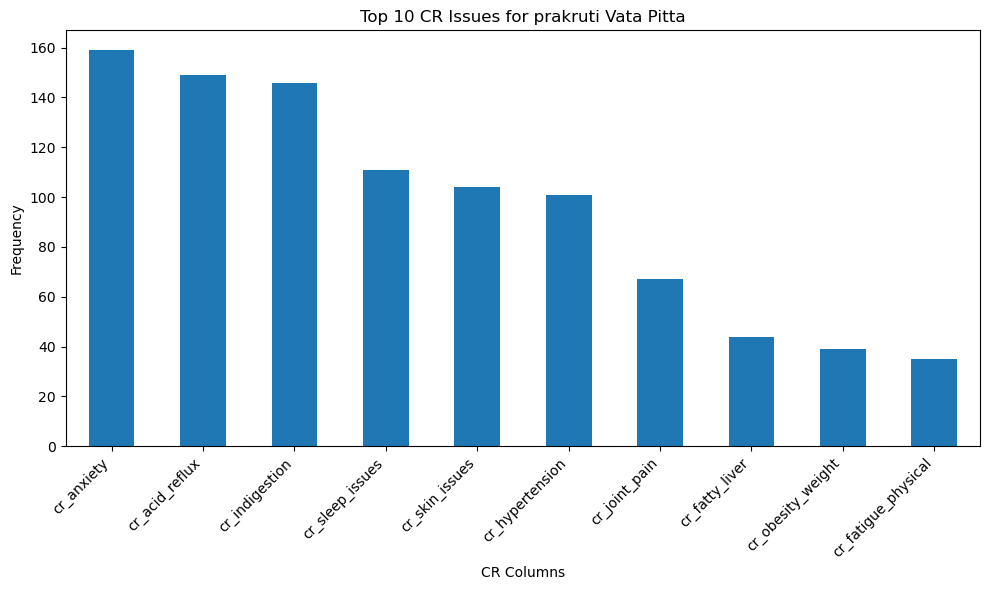

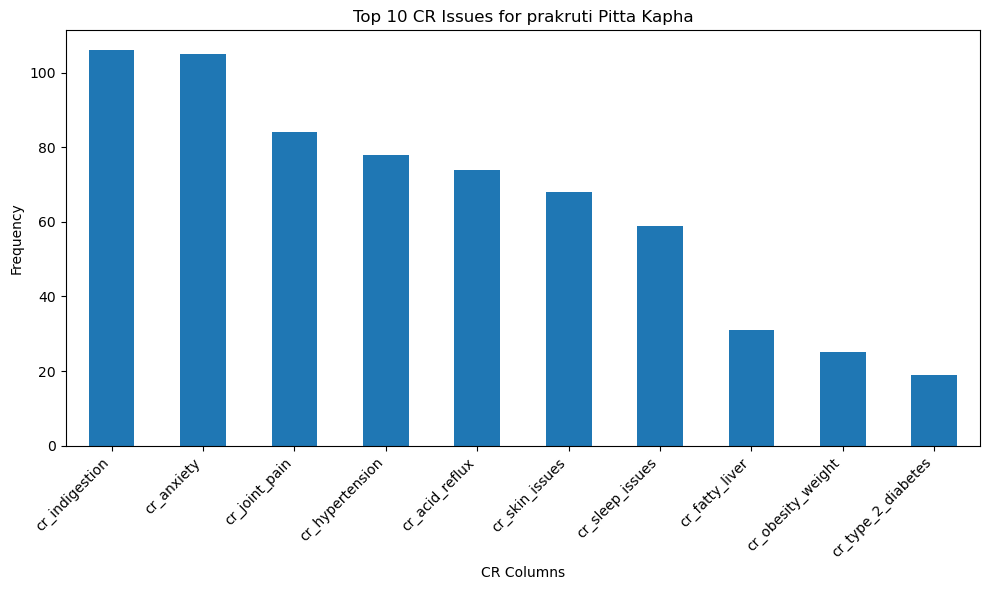

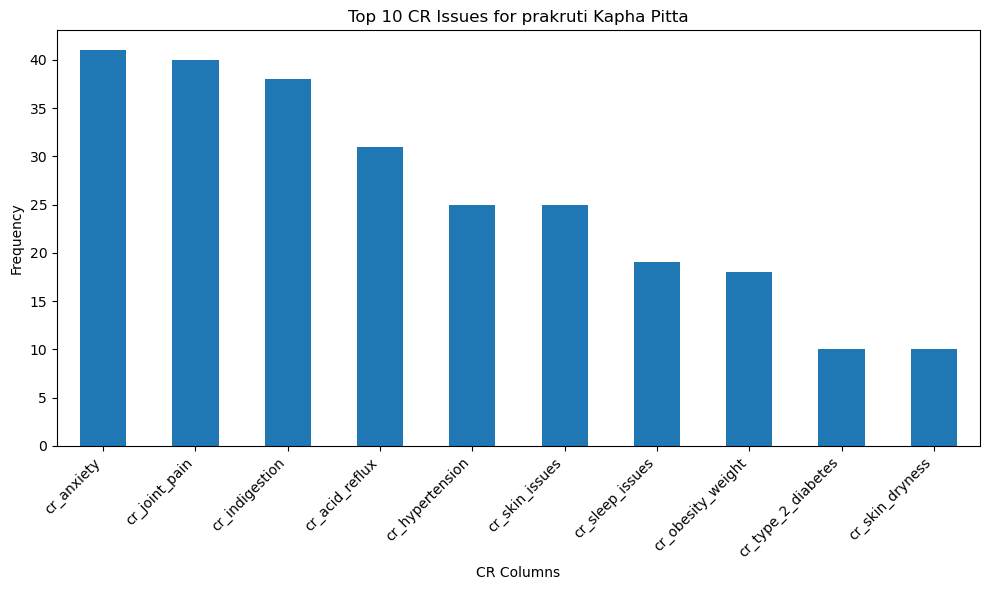

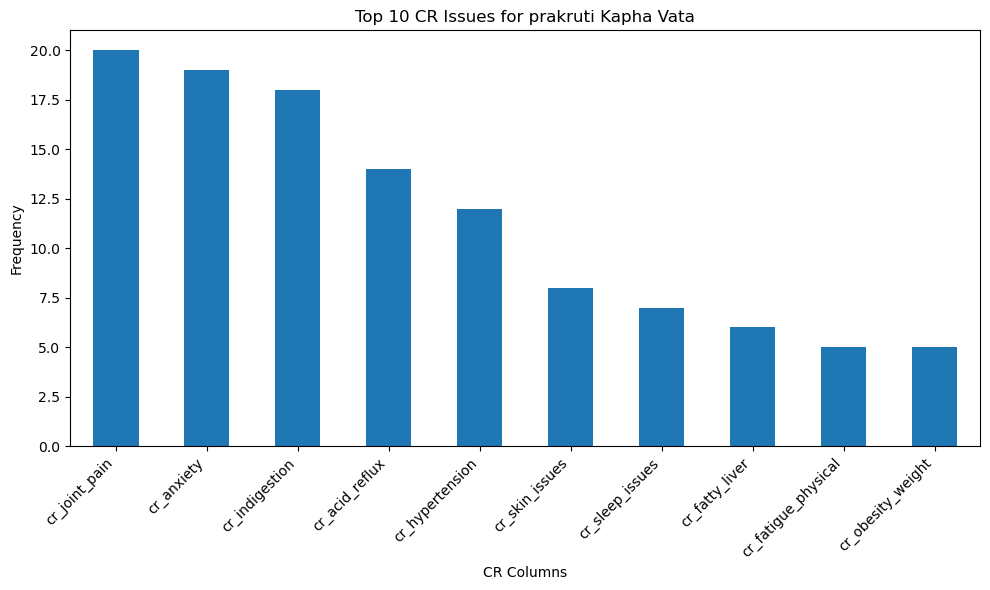

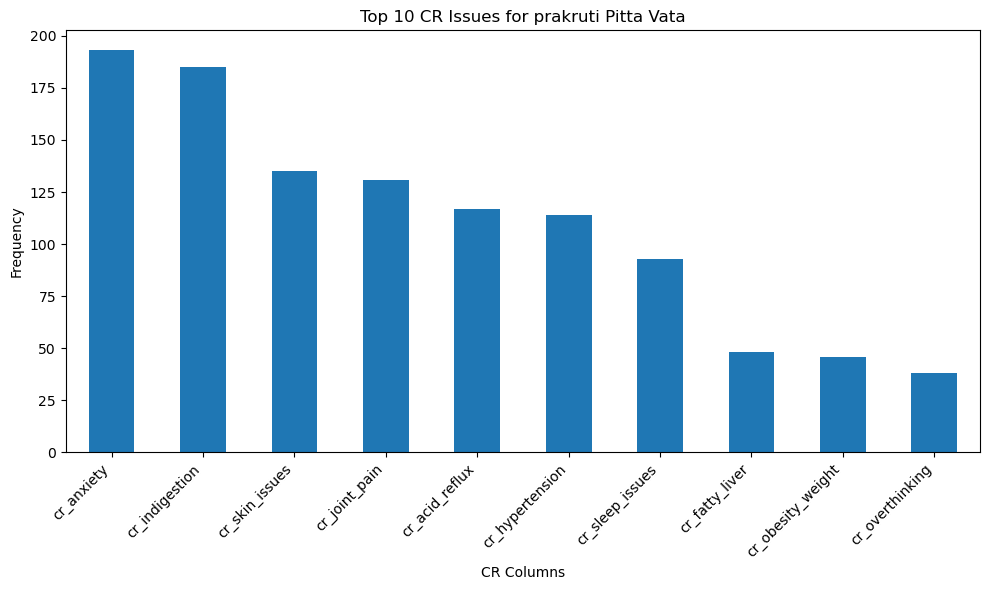

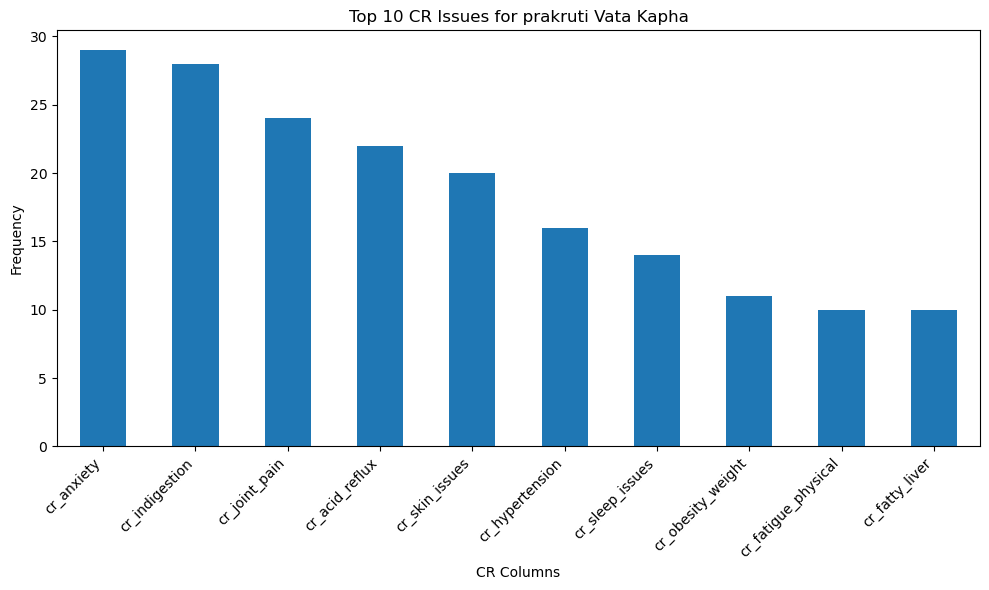

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure created_at_date is datetime
data["created_at_date"] = pd.to_datetime(data["created_at_date"], errors="coerce")

# Filter for date >= 1st Sept 2025 and blank prakruti
filtered = data[
    (data["created_at_date"] >= "2025-09-01") & 
    (data["prakruti"].notna())
]

# Get cr columns
cr_cols = [col for col in filtered.columns if col.startswith("cr_")]

# Loop through each dominant_prakruti and plot
prakruti = filtered["prakruti"].dropna().unique()

for prakruti in prakruti:
    subset = filtered[filtered["prakruti"] == prakruti]
    
    # Sum frequencies of each cr column
    counts = subset[cr_cols].sum().sort_values(ascending=False).head(10)
    
    # Plot
    plt.figure(figsize=(10,6))
    counts.plot(kind="bar")
    plt.title(f"Top 10 CR Issues for prakruti {prakruti}")
    plt.ylabel("Frequency")
    plt.xlabel("CR Columns")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(f"prakruti_{prakruti}_future_health_issues.png", dpi=300, bbox_inches="tight")
    plt.show()